# ZPIC Python interface

This notebook illustrates the use of the ZPIC Python interface to run a simulation and save the results to disk.

Calling ZPIC from Python requires importing the appropriate ZPIC module. For this example we will be using the EM1D code, so we need to import the `em1d` module.

In [1]:
import sys  
sys.path.insert(0, '../source')
import em1d

Initializing a ZPIC simulation requires setting the simulation box and timestep

In [2]:
import numpy as np

nx = 120
box = 4 * np.pi
dt = 0.1
tmax = 50.0

ndump = 10

Next we need to describe the particle species in the simulation. In this example (demonstration of the two stream instability) we are using 2 species:

In [3]:
ppc = 500
ufl = [0.4,    0.0,  0.0]
uth = [0.001,0.001,0.001]

right = em1d.Species( "right", -1.0, ppc, ufl = ufl, uth = uth )

ufl[0] = -ufl[0]
left  = em1d.Species( "left", -1.0, ppc, ufl = ufl, uth = uth )

## Writing diagnostic output to disk

You can run ZPIC inside the notebook (or any interactive Python/iPython session) and access all the simulation data directly in memory, without writing any output to disk, as described in other notebooks in this folder. For most situations this is the recommended way of using the code. However, if you your simulation takes a long time to compute, you may want to write diagnostic information to disk for post-processing later.

To do this you must define the required diagnostics in a python function that accepts as a single argument a simulation object. This routine will be called once per iteration, and it can access global variables defined in the Python code, e.g.:

In [4]:
def rep( sim ):
    # sim.n has the current simulation iteration
    if (sim.n % ndump == 0):
        right.report("particles")
        left.report("particles")
        sim.emf.report("E",0)

We can now initialize the simulation, passing in the function we just created

In [5]:
sim = em1d.Simulation( nx, box, dt, species = [right,left], report = rep )

To run the simulation use the `run` method, giving the final time as the sole parameter:

In [6]:
sim.run(tmax)


Running simulation up to t = 50 ...
n = 501, t = 50.1
Done.


## Accessing simulation results

Simulation results are saved in the ZDF format, as in normal (non-Python) ZPIC simulations, and can now be visualized in the noteboook:

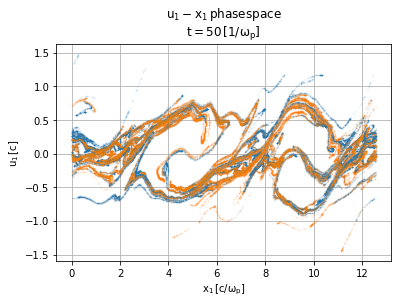

In [7]:
import zdf
import matplotlib.pyplot as plt

(particles,info) = zdf.read("PARTICLES/particles-right-000500.zdf")

x = particles['x1']
y = particles['u1']

plt.plot(x, y, '.', ms=1,alpha=0.1)


title = "u_1-x_1\,phasespace"
timeLabel = "t = {:g}\,[{:s}]".format(info.iteration.t, info.iteration.tunits)

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{' + timeLabel + r'}$')

xlabel = "x_1\,[{:s}]".format( info.particles.units['x1'] )
ylabel = "u_1\,[{:s}]".format( info.particles.units['u1'] )

plt.xlabel(r'$\sf{' + xlabel + r'}$')
plt.ylabel(r'$\sf{' + ylabel + r'}$')

(particles,info) = zdf.read("PARTICLES/particles-left-000500.zdf")

x = particles['x1']
y = particles['u1']

plt.plot(x, y, '.', ms=1,alpha=0.1)

plt.grid(True)

plt.show()